In [2]:
# import the libraries

import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

!pip install --upgrade scikit-learn
!pip install transformers

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from collections import defaultdict

nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
import pandas as pd
from google.colab import files
import nltk
import gensim
import re
import sklearn
import spacy
from collections import defaultdict
from nltk.tokenize import word_tokenize
from nltk import WordNetLemmatizer
import spacy
from textblob import TextBlob
from itertools import groupby
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from collections import defaultdict
from nltk.tokenize import sent_tokenize


nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords

# from datasets import list_datasets, load_dataset

# clear_output()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to 

In [3]:
from IPython.display import clear_output
# !pip install datasets
!pip install textblob
clear_output()

In [3]:
# import pandas as pd
# from google.colab import files
# import nltk
# import gensim
# import re
# import sklearn
# from nltk.tokenize import word_tokenize
# from nltk import WordNetLemmatizer
# import spacy
# from textblob import TextBlob
# from itertools import groupby
# import nltk
# from nltk.sentiment import SentimentIntensityAnalyzer
# from nltk.corpus import wordnet as wn
# from nltk.stem.wordnet import WordNetLemmatizer
# from collections import defaultdict

# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt')
# nltk.download('wordnet')

# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# from nltk.corpus import stopwords

# # from datasets import list_datasets, load_dataset

# clear_output()

In [4]:
# read the dataset with 1000 rows only
yelp_reviews = pd.read_csv("/content/yelp.csv")
yelp_reviews = yelp_reviews.sample(n = 1000, random_state=42).reset_index(drop=True)

In [5]:
#yelp_reviews dataset
print(len(yelp_reviews))
yelp_reviews.head()

1000


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,We got here around midnight last Friday... the...,review,90a6z--_CUrl84aCzZyPsg,5,5,2
1,24qSrF_XOrvaHDBy-gLIQg,2012-01-22,0mvthYPKb2ZmKhCADiKSmQ,5,Brought a friend from Louisiana here. She say...,review,9lJAj_2zCvP2jcEiRjF9oA,0,0,0
2,j0Uc-GuOe-x9_N_IK1KPpA,2009-05-09,XJHknNIecha6h0wkBSZB4w,3,"Every friday, my dad and I eat here. We order ...",review,0VfJi9Au0rVFVnPKcJpt3Q,0,0,0
3,RBiiGw8c7j-0a8nk35JO3w,2010-12-22,z6y3GRpYDqTznVe-0dn--Q,1,"My husband and I were really, really disappoin...",review,lwppVF0Yqkuwt-xaEuugqw,2,2,2
4,U8VA-RW6LYOhxR-Ygi6eDw,2011-01-17,vhWHdemMvsqVNv5zi2OMiA,5,Love this place! Was in phoenix 3 weeks for w...,review,Y2R_tlSk4lTHiLXTDsn1rg,0,1,0


In [6]:
#information about yelp_reviews to see if there is null values or not
yelp_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  1000 non-null   object
 1   date         1000 non-null   object
 2   review_id    1000 non-null   object
 3   stars        1000 non-null   int64 
 4   text         1000 non-null   object
 5   type         1000 non-null   object
 6   user_id      1000 non-null   object
 7   cool         1000 non-null   int64 
 8   useful       1000 non-null   int64 
 9   funny        1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [7]:
#change the data type of review_date from object to date 
yelp_reviews['date']= pd.to_datetime(yelp_reviews['date'])

In [8]:
# Set the option to display full row value
pd.set_option('display.max_colwidth', None)

In [9]:
#review column on which sentiment analysis has to be done
yelp_reviews['text']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               We got here around midnight last Friday... the place was dead. However, they were still serving food and we enjoyed some well made pub grub. Service was friendly, quality cocktails were served, and the atmosphere is derived from an old Uno's, which certainly works for a sports bar. It being located in a somewhat commercial area, I can see why it's empty so late on a Friday. From what my friends tell me - this is a great spot for happy hour, and it stay

In [10]:
# preprocessing

nlp = spacy.load("en_core_web_sm")
# spacy_stopwords = list(set(nlp.Defaults.stop_words)) # 326
nltk_stopwords = list(set(stopwords.words('english'))) # 179
# stop_words = spacy_stopwords + nltk_stopwords # 382
stop_words = list(set(nltk_stopwords))

user_stopwords = ['im','ive','etc','mne']
stop_words += user_stopwords

In [11]:
def normalize_document(review):
  
  # lower case and remove special characters\whitespaces
  doc = review.lower()
  doc = doc.replace('-',' ')
  doc = re.sub('<[^>]+>', '', doc)
  doc = doc.replace('.','. ')
  doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
  doc = doc.strip()
  doc = re.sub("\s\s+", " ", doc)

  # English pipelines include a rule-based lemmatizer
  lemmatizer = nlp.get_pipe("lemmatizer")

  doc2 = nlp(doc)
  token_lemma = ' '.join([token.lemma_ for token in doc2 if len(token) > 2])
  tokens = word_tokenize(token_lemma)
  filtered_tokens = ' '.join([token for token in tokens if token not in stop_words])
    
  return filtered_tokens

In [12]:
#apply the preprocessing step on text column to generate text2 have cleaned text column
yelp_reviews['text2']= yelp_reviews['text'].apply(normalize_document)

In [13]:
#subset yelp_reviews to create reviews dataframe to have 'review_id', 'text2'
reviews = yelp_reviews[['review_id', 'text2']]

In [63]:
#perform aspect analysis on text2 column of review dataframe

def extract_aspect_sentiment(row):
    review_id = row['review_id']
    text = row['text2']

    # Tokenize the text into sentences and words
    sentences = sent_tokenize(text)
    words = [word_tokenize(sentence) for sentence in sentences]

    # Tag the words with their parts of speech
    tagged_words = [nltk.pos_tag(sentence) for sentence in words]

    # Find the noun and adjective aspects in the text
    aspect_groups = {}
    for sentence, tagged_sentence in zip(words, tagged_words):
        for word, tag in tagged_sentence:
            if tag.startswith('N') or tag.startswith('J'):
                # Find the synset for the word
                synsets = wn.synsets(word)
                if len(synsets) > 0:
                    synset = synsets[0]
                    # Find the hypernyms for the synset
                    hypernyms = synset.hypernyms()
                    if len(hypernyms) > 0:
                        hypernym = hypernyms[0].name().split('.')[0]
                        # Add the word to the appropriate aspect group
                        if hypernym not in aspect_groups:
                            aspect_groups[hypernym] = []
                        aspect_groups[hypernym].append((sentence, (word, 0)))

    # Calculate the sentiment score for each aspect group
    sia = SentimentIntensityAnalyzer()
    aspect_group_sentiments = []
    for aspect_key, aspect_group in aspect_groups.items():
        aspect_polarity_scores = [sia.polarity_scores(' '.join(sentence))['compound'] for sentence, (aspect, s) in aspect_group]
        aspect_sentiments = [(aspect, sia.polarity_scores(' '.join(sentence))['compound']) for sentence, (aspect, s) in aspect_group]
        aspect_group_sentiments.append((aspect_key, sum(aspect_polarity_scores)/len(aspect_polarity_scores), aspect_sentiments))

    # Calculate the overall sentiment score for all aspect groups
    overall_sentiment_score = 0
    if len(aspect_group_sentiments) > 0:
        overall_sentiment_score = sum([sentiment for aspect, sentiment, _ in aspect_group_sentiments]) / len(aspect_group_sentiments)

    return {'review_id': review_id, 'aspect_group_sentiments': aspect_group_sentiments, 'overall_sentiment_score': overall_sentiment_score}

# create new dataframe containing review id and aspects group that contribute to positive negative or neutral reviews buy taking context into account
review_decomp = reviews.apply(lambda row: extract_aspect_sentiment(row), axis=1)
review_decomp = pd.DataFrame.from_records(review_decomp)




In [64]:
#extract the aspects into new column 
aspect_group_labels = []
for row in review_decomp.itertuples():
    aspect_group_sentiments = row.aspect_group_sentiments
    aspect_group_label = [(aspect[0], aspect[1]) for aspect in aspect_group_sentiments]
    aspect_group_labels.append(aspect_group_label)

review_decomp['aspect_group_labels'] = aspect_group_labels

In [65]:
#extract overall sentiments of the review into one column 
aspect_group_sentiments_dict = {}

for row in review_decomp.itertuples():
    aspect_group_sentiments = row.aspect_group_sentiments
    review_id = row.review_id
    aspect_group_sentiments_dict[review_id] = aspect_group_sentiments

for i, row in review_decomp.iterrows():
    review_id = row['review_id']
    aspect_group_sentiments = aspect_group_sentiments_dict.get(review_id)
    review_decomp.at[i, 'aspect_group_sentiments'] = aspect_group_sentiments




In [39]:
#review_decomp containing aspect_group_sentiments	overall_sentiment_score	aspect_group_labels
review_decomp


,review_id,aspect_group_sentiments,overall_sentiment_score,aspect_group_labels
0,hwYVJs8Ko4PMjI19QcR57g,"[(hour, 0.9633, [('midnight', 0.9633)]), (end, 0.9633, [('last', 0.9633)]), (weekday, 0.9633, [('friday', 0.9633), ('friday', 0.9633)]), (point, 0.9633, [('place', 0.9633), ('spot', 0.9633)]), (people, 0.9633, [('dead', 0.9633)]), (substance, 0.9633, [('food', 0.9633)]), (tavern, 0.9633, [('pub', 0.9633)]), (fare, 0.9633, [('grub', 0.9633)]), (work, 0.9633, [('service', 0.9633), ('busy', 0.9633)]), (military_personnel, 0.9633, [('friendly', 0.9633)]), (attribute, 0.9633, [('quality', 0.9633)]), (mixed_drink, 0.9633, [('cocktail', 0.9633)]), (tennis_stroke, 0.9633, [('serve', 0.9633)]), (reason, 0.9633, [('derive', 0.9633)]), (past, 0.9633, [('old', 0.9633)]), (activity, 0.9633, [('work', 0.9633)]), (diversion, 0.9633, [('sport', 0.9633)]), (room, 0.9633, [('bar', 0.9633)]), (find, 0.9633, [('locate', 0.9633)]), (ad, 0.9633, [('commercial', 0.9633)]), (region, 0.9633, [('area', 0.9633)]), (container, 0.9633, [('empty', 0.9633)]), (achiever, 0.9633, [('great', 0.9633), ('great', 0.9633)]), (time_unit, 0.9633, [('hour', 0.9633), ('day', 0.9633)]), (act, 0.9633, [('stay', 0.9633)]), (news, 0.9633, [('update', 0.9633)]), (area, 0.9633, [('patio', 0.9633)]), (time_period, 0.9633, [('weekend', 0.9633)])]",0.9633,"[(hour, 0.9633), (end, 0.9633), (weekday, 0.9633), (point, 0.9633), (people, 0.9633), (substance, 0.9633), (tavern, 0.9633), (fare, 0.9633), (work, 0.9633), (military_personnel, 0.9633), (attribute, 0.9633), (mixed_drink, 0.9633), (tennis_stroke, 0.9633), (reason, 0.9633), (past, 0.9633), (activity, 0.9633), (diversion, 0.9633), (room, 0.9633), (find, 0.9633), (ad, 0.9633), (region, 0.9633), (container, 0.9633), (achiever, 0.9633), (time_unit, 0.9633), (act, 0.9633), (news, 0.9633), (area, 0.9633), (time_period, 0.9633)]"
1,0mvthYPKb2ZmKhCADiKSmQ,"[(person, 0.7269, [('friend', 0.7269)]), (shellfish, 0.7269, [('crawfish', 0.7269)]), (advantage, 0.7269, [('good', 0.7269)])]",0.7269,"[(person, 0.7269), (shellfish, 0.7269), (advantage, 0.7269)]"
2,XJHknNIecha6h0wkBSZB4w,"[(weekday, 0.4404, [('friday', 0.4404)]), (consume, 0.4404, [('eat', 0.4404)]), (command, 0.4404, [('order', 0.4404)]), (situation, 0.4404, [('thing', 0.4404)]), (dish, 0.4404, [('pizza', 0.4404), ('pizza', 0.4404)]), (cloak, 0.4404, [('wrap', 0.4404)]), (advantage, 0.4404, [('good', 0.4404)]), (beverage, 0.4404, [('tea', 0.4404)]), (feat, 0.4404, [('hit', 0.4404)]), (point, 0.4404, [('spot', 0.4404)]), (part, 0.4404, [('strip', 0.4404)]), (walk, 0.4404, [('mall', 0.4404)])]",0.4404,"[(weekday, 0.4404), (consume, 0.4404), (command, 0.4404), (situation, 0.4404), (dish, 0.4404), (cloak, 0.4404), (advantage, 0.4404), (beverage, 0.4404), (feat, 0.4404), (point, 0.4404), (part, 0.4404), (walk, 0.4404)]"
3,z6y3GRpYDqTznVe-0dn--Q,"[(spouse, -0.9404, [('husband', -0.9404)]), (thwart, -0.9404, [('disappointed', -0.9404), ('disappointing', -0.9404)]), (education, -0.9404, [('experience', -0.9404)]), (wedge, -0.9404, [('coulter', -0.9404), ('coulter', -0.9404)]), (transport, -0.9404, [('bring', -0.9404)]), (linear_unit, -0.9404, [('mile', -0.9404)]), (assurance, -0.9404, [('warranty', -0.9404)]), (protective_covering, -0.9404, [('roof', -0.9404), ('roof', -0.9404), ('roof', -0.9404)]), (countenance, -0.9404, [('look', -0.9404)]), (machine, -0.9404, [('motor', -0.9404)]), (activity, -0.9404, [('work', -0.9404), ('attempt', -0.9404), ('search', -0.9404)]), (motor_vehicle, -0.9404, [('car', -0.9404), ('car', -0.9404), ('car', -0.9404), ('car', -0.9404), ('auto', -0.9404)]), (time_unit, -0.9404, [('day', -0.9404), ('second', -0.9404)]), (telephone, -0.9404, [('call', -0.9404)]), (condition, -0.9404, [('need', -0.9404)]), (concept, -0.9404, [('whole', -0.9404)]), (line, -0.9404, [('track', -0.9404)]), (interaction, -0.9404, [('contact', -0.9404)]), (place_of_business, -0.9404, [('office', -0.9404)]), (covering, -0.9404, [('cover', -0.9404)]), (right, -0.9404, [('due', -0.940

In [94]:
# to see which words contribute to the sentiments of the review

import operator

# Get the aspect group labels and corresponding sentiment scores for the first review
aspect_group_labels = review_decomp.iloc[5]['aspect_group_labels']
aspect_group_sentiments = review_decomp.iloc[5]['aspect_group_sentiments']

# Sort the aspect groups by sentiment score in descending order
aspect_group_sentiments = sorted(aspect_group_sentiments, key=operator.itemgetter(1), reverse=True)

# Print the top 5 aspect groups and the words that contributed to their sentiment scores
num_top_aspect_groups = 5
for i in range(num_top_aspect_groups):
    aspect_group_label = aspect_group_labels[i]
    aspect_sentiments = aspect_group_sentiments[i][2]
    aspect_sentiments = sorted(aspect_sentiments, key=operator.itemgetter(1), reverse=True)
    top_words = [word for word, score in aspect_sentiments[:5]]
    print(f"{aspect_group_label}: {top_words}")


('building', 0.968): ['hotel', 'hotel', 'hotel']
('advantage', 0.968): ['good']
('object', 0.968): ['location']
('diversion', 0.968): ['sport']
('scene', 0.968): ['venue']


In [42]:
#review_decomp inormation to see if we have any null values
review_decomp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   review_id                1000 non-null   object 
 1   aspect_group_sentiments  1000 non-null   object 
 2   overall_sentiment_score  1000 non-null   float64
 3   aspect_group_labels      1000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 31.4+ KB


In [68]:
#convert aspect_group_labels into document term matrix and then apply hierarichal clustering by 4 clusters randomly

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.cluster import AgglomerativeClustering

# Combine the aspect group labels for all reviews into a list
aspect_group_labels = review_decomp['aspect_group_labels'].tolist()

# Convert the list of aspect group labels into a bag-of-words representation
count_vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
bag_of_words = count_vectorizer.fit_transform(aspect_group_labels)

# Normalize the bag-of-words representation
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(bag_of_words)

# Cluster the reviews based on their aspect group sentiments
n_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete', affinity='euclidean').fit(tfidf_matrix.toarray())

# Assign the cluster labels to each review
review_decomp['cluster_labels'] = agg_clustering.labels_

# Output the cluster labels for each review
for i, row in review_decomp.iterrows():
    print(row['review_id'], 'cluster:', row['cluster_labels'])




/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


hwYVJs8Ko4PMjI19QcR57g cluster: 0
0mvthYPKb2ZmKhCADiKSmQ cluster: 0
XJHknNIecha6h0wkBSZB4w cluster: 0
z6y3GRpYDqTznVe-0dn--Q cluster: 0
vhWHdemMvsqVNv5zi2OMiA cluster: 0
dg1Sw8sihJCUKGiQ7Yl_tg cluster: 0
ZQ2S7QL9ubt_zZdcE4Kz9Q cluster: 0
DFBb_9IR5sc0sCsi7Hhn5w cluster: 0
7ZrirtO2rOCR8aHNIU6SfA cluster: 0
XFVJstX3gRXv3Bhitzk9rA cluster: 0
xWAvESbLyNmdpdvK32zz5g cluster: 0
yPNKoTo0W2j-6CxfONssLg cluster: 0
gvdxUyeULOzj8irBHwzhdA cluster: 0
1FLzfSSQMNekqAaMC0jyOA cluster: 0
FcIL0kPumNkm-ks908FX8A cluster: 0
72RLVL7ulxXkh-Sv01l73w cluster: 0
5rzUPtAk7rR5EK8x_WszwA cluster: 0
TNjJ7gjtr7gjJ_LQDrCUIw cluster: 0
cBuGiqccc8mE8x6f_JidHg cluster: 0
SkO0tzjC5Xyt4ZzMC9XS9w cluster: 0
b01QqdMpIIaeEnMs_g92pQ cluster: 0
sEpffpL6SPsu4vUlI9la1g cluster: 0
BvFYrSSJRDqJwSbVyQhPVw cluster: 0
psMnrkshrBBbqk-2SxX5og cluster: 0
uMQ4juin9OVWjvOnLn--NA cluster: 0
930PX8SNo5zxtlcJOio4ig cluster: 0
SMTjk42KnUfJn1vLh8Y_eA cluster: 0
VqDKlhAtDIRjxQdwvqusBQ cluster: 0
enO2RiutNuor8px7AmK81Q cluster: 0
swAgg95rDJ6I2S

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric

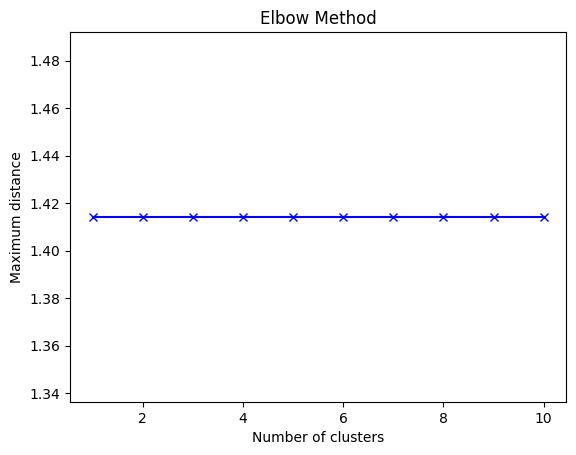

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be remo

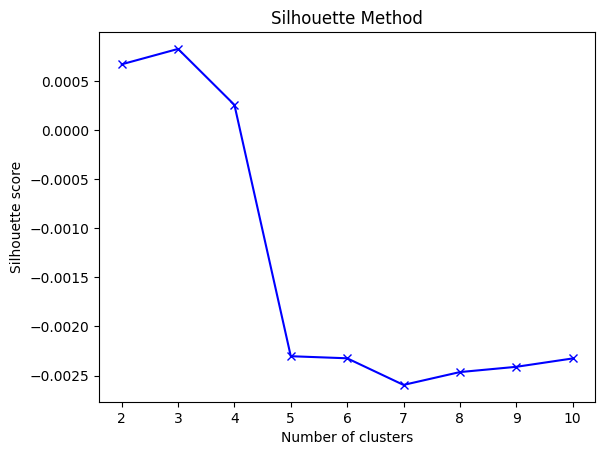

In [69]:
#instead of random appling clustering by using sillhoute score and elbow method

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt

# Combine the aspect group labels for all reviews into a list
aspect_group_labels = review_decomp['aspect_group_labels'].tolist()

# Convert the list of aspect group labels into a bag-of-words representation
count_vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
bag_of_words = count_vectorizer.fit_transform(aspect_group_labels)

# Normalize the bag-of-words representation
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(bag_of_words)

# Find the optimal number of clusters using the elbow method
distortions = []
K = range(1, 11)
for k in K:
    agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='complete', affinity='euclidean').fit(tfidf_matrix.toarray())
    linkage_matrix = linkage(tfidf_matrix.toarray(), method='complete', metric='euclidean')
    max_distance = linkage_matrix[:, 2].max()
    distortions.append(max_distance)

# Plot the elbow graph
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Maximum distance')
plt.title('Elbow Method')
plt.show()

# Find the optimal number of clusters using the silhouette method
silhouette_scores = []
K = range(2, 11)
for k in K:
    agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='complete', affinity='euclidean').fit(tfidf_matrix.toarray())
    labels = agg_clustering.labels_
    silhouette_scores.append(silhouette_score(tfidf_matrix, labels))

# Plot the silhouette graph
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

# # Cluster the reviews based on their aspect group sentiments
# n_clusters = 2 # Replace with the optimal number of clusters based on the elbow or silhouette method
# agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete', affinity='euclidean').fit(tfidf_matrix.toarray())

# # Assign the cluster labels to each review
# review_decomp['cluster_labels'] = agg_clustering.labels_

# # Output the cluster labels for each review
# for i, row in review_decomp.iterrows():
#     print(row['review_id'], 'cluster:', row['cluster_labels'])



/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric

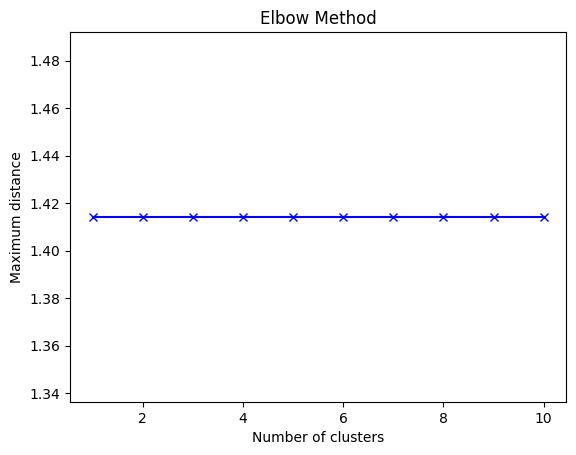

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be remo

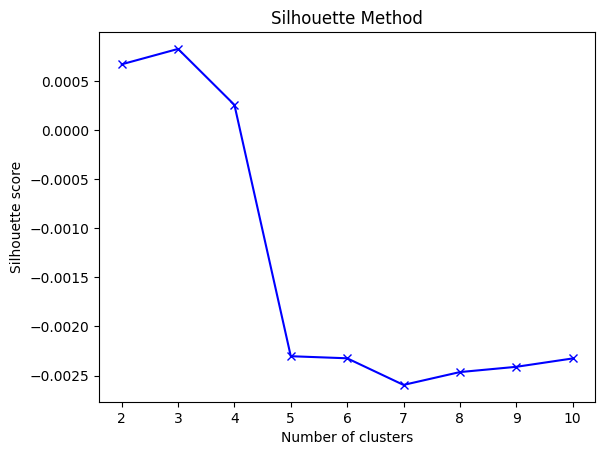

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


hwYVJs8Ko4PMjI19QcR57g cluster: 1
0mvthYPKb2ZmKhCADiKSmQ cluster: 1
XJHknNIecha6h0wkBSZB4w cluster: 1
z6y3GRpYDqTznVe-0dn--Q cluster: 0
vhWHdemMvsqVNv5zi2OMiA cluster: 1
dg1Sw8sihJCUKGiQ7Yl_tg cluster: 0
ZQ2S7QL9ubt_zZdcE4Kz9Q cluster: 1
DFBb_9IR5sc0sCsi7Hhn5w cluster: 0
7ZrirtO2rOCR8aHNIU6SfA cluster: 1
XFVJstX3gRXv3Bhitzk9rA cluster: 1
xWAvESbLyNmdpdvK32zz5g cluster: 1
yPNKoTo0W2j-6CxfONssLg cluster: 1
gvdxUyeULOzj8irBHwzhdA cluster: 0
1FLzfSSQMNekqAaMC0jyOA cluster: 1
FcIL0kPumNkm-ks908FX8A cluster: 0
72RLVL7ulxXkh-Sv01l73w cluster: 1
5rzUPtAk7rR5EK8x_WszwA cluster: 0
TNjJ7gjtr7gjJ_LQDrCUIw cluster: 1
cBuGiqccc8mE8x6f_JidHg cluster: 0
SkO0tzjC5Xyt4ZzMC9XS9w cluster: 0
b01QqdMpIIaeEnMs_g92pQ cluster: 1
sEpffpL6SPsu4vUlI9la1g cluster: 0
BvFYrSSJRDqJwSbVyQhPVw cluster: 0
psMnrkshrBBbqk-2SxX5og cluster: 1
uMQ4juin9OVWjvOnLn--NA cluster: 0
930PX8SNo5zxtlcJOio4ig cluster: 0
SMTjk42KnUfJn1vLh8Y_eA cluster: 0
VqDKlhAtDIRjxQdwvqusBQ cluster: 1
enO2RiutNuor8px7AmK81Q cluster: 1
swAgg95rDJ6I2S

In [67]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster
import matplotlib.pyplot as plt

# Combine the aspect group labels for all reviews into a list
aspect_group_labels = review_decomp['aspect_group_labels'].tolist()

# Convert the list of aspect group labels into a bag-of-words representation
count_vectorizer = CountVectorizer(tokenizer=lambda x: x, lowercase=False)
bag_of_words = count_vectorizer.fit_transform(aspect_group_labels)

# Normalize the bag-of-words representation
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(bag_of_words)

# Cluster the reviews based on their aspect group sentiments
n_clusters = 4 # Replace with the optimal number of clusters based on the silhouette method
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete', affinity='euclidean').fit(tfidf_matrix.toarray())

# Assign the cluster labels to each review
review_decomp['cluster_labels'] = agg_clustering.labels_

# Output the cluster labels for each review
for i, row in review_decomp.iterrows():
    print(row['review_id'], 'cluster:', row['cluster_labels'])


In [76]:
#cluster reviews based solely on their overall sentiment scores and randomly selecting the cluster
from sklearn.preprocessing import StandardScaler
import numpy as np

sentiment_scores = review_decomp['overall_sentiment_score'].tolist()


# Convert the list of sentiment scores into a NumPy array
sentiment_scores_arr = np.array(sentiment_scores).reshape(-1, 1)

# Standardize the sentiment scores
scaler = StandardScaler()
sentiment_scores_std = scaler.fit_transform(sentiment_scores_arr)

# Cluster the reviews based on their sentiment scores
n_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete', affinity='euclidean').fit(sentiment_scores_std)

# Assign the cluster labels to each review
review_decomp['cluster_labels'] = agg_clustering.labels_

# Output the cluster labels for each review
for i, row in review_decomp.iterrows():
    print(row['review_id'], 'cluster:', row['cluster_labels'])


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


hwYVJs8Ko4PMjI19QcR57g cluster: 3
0mvthYPKb2ZmKhCADiKSmQ cluster: 3
XJHknNIecha6h0wkBSZB4w cluster: 1
z6y3GRpYDqTznVe-0dn--Q cluster: 2
vhWHdemMvsqVNv5zi2OMiA cluster: 3
dg1Sw8sihJCUKGiQ7Yl_tg cluster: 3
ZQ2S7QL9ubt_zZdcE4Kz9Q cluster: 3
DFBb_9IR5sc0sCsi7Hhn5w cluster: 3
7ZrirtO2rOCR8aHNIU6SfA cluster: 3
XFVJstX3gRXv3Bhitzk9rA cluster: 0
xWAvESbLyNmdpdvK32zz5g cluster: 3
yPNKoTo0W2j-6CxfONssLg cluster: 3
gvdxUyeULOzj8irBHwzhdA cluster: 0
1FLzfSSQMNekqAaMC0jyOA cluster: 3
FcIL0kPumNkm-ks908FX8A cluster: 3
72RLVL7ulxXkh-Sv01l73w cluster: 3
5rzUPtAk7rR5EK8x_WszwA cluster: 3
TNjJ7gjtr7gjJ_LQDrCUIw cluster: 1
cBuGiqccc8mE8x6f_JidHg cluster: 3
SkO0tzjC5Xyt4ZzMC9XS9w cluster: 3
b01QqdMpIIaeEnMs_g92pQ cluster: 3
sEpffpL6SPsu4vUlI9la1g cluster: 3
BvFYrSSJRDqJwSbVyQhPVw cluster: 3
psMnrkshrBBbqk-2SxX5og cluster: 3
uMQ4juin9OVWjvOnLn--NA cluster: 3
930PX8SNo5zxtlcJOio4ig cluster: 3
SMTjk42KnUfJn1vLh8Y_eA cluster: 0
VqDKlhAtDIRjxQdwvqusBQ cluster: 3
enO2RiutNuor8px7AmK81Q cluster: 1
swAgg95rDJ6I2S

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be remo

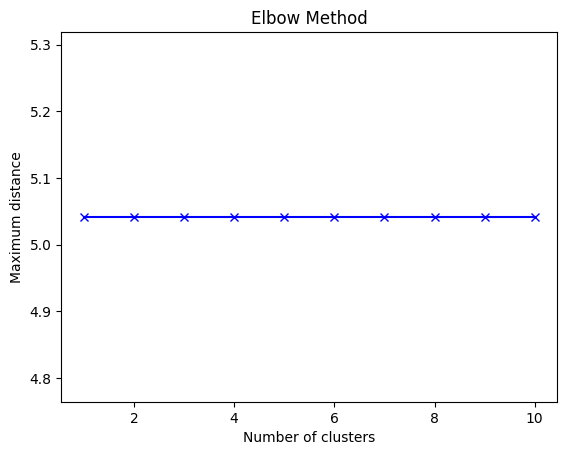

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be remo

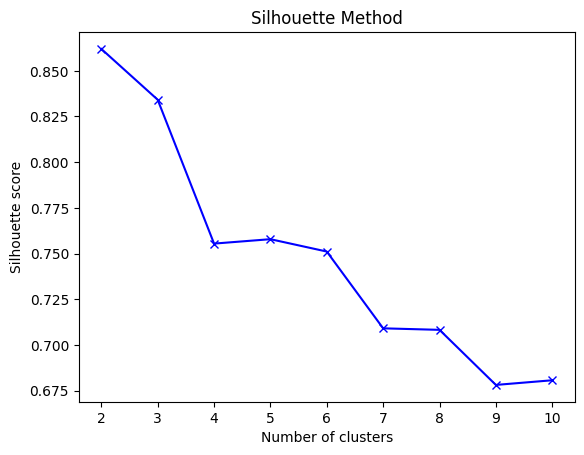

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
<ipython-input-77-bbc2ba6587bd>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['cluster_labels'] = agg_clustering.labels_


hwYVJs8Ko4PMjI19QcR57g cluster: 3
0mvthYPKb2ZmKhCADiKSmQ cluster: 3
XJHknNIecha6h0wkBSZB4w cluster: 1
z6y3GRpYDqTznVe-0dn--Q cluster: 2
vhWHdemMvsqVNv5zi2OMiA cluster: 3
dg1Sw8sihJCUKGiQ7Yl_tg cluster: 3
ZQ2S7QL9ubt_zZdcE4Kz9Q cluster: 3
DFBb_9IR5sc0sCsi7Hhn5w cluster: 3
7ZrirtO2rOCR8aHNIU6SfA cluster: 3
XFVJstX3gRXv3Bhitzk9rA cluster: 0
xWAvESbLyNmdpdvK32zz5g cluster: 3
yPNKoTo0W2j-6CxfONssLg cluster: 3
gvdxUyeULOzj8irBHwzhdA cluster: 0
1FLzfSSQMNekqAaMC0jyOA cluster: 3
FcIL0kPumNkm-ks908FX8A cluster: 3
72RLVL7ulxXkh-Sv01l73w cluster: 3
5rzUPtAk7rR5EK8x_WszwA cluster: 3
TNjJ7gjtr7gjJ_LQDrCUIw cluster: 1
cBuGiqccc8mE8x6f_JidHg cluster: 3
SkO0tzjC5Xyt4ZzMC9XS9w cluster: 3
b01QqdMpIIaeEnMs_g92pQ cluster: 3
sEpffpL6SPsu4vUlI9la1g cluster: 3
BvFYrSSJRDqJwSbVyQhPVw cluster: 3
psMnrkshrBBbqk-2SxX5og cluster: 3
uMQ4juin9OVWjvOnLn--NA cluster: 3
930PX8SNo5zxtlcJOio4ig cluster: 3
SMTjk42KnUfJn1vLh8Y_eA cluster: 0
VqDKlhAtDIRjxQdwvqusBQ cluster: 3
enO2RiutNuor8px7AmK81Q cluster: 1
swAgg95rDJ6I2S

In [77]:
#  cluster reviews based  overall sentiment scores using elbow or sillhoutte method
from sklearn.preprocessing import StandardScaler
import numpy as np

sentiment_scores = review_decomp['overall_sentiment_score'].tolist()


# Convert the list of sentiment scores into a NumPy array
sentiment_scores_arr = np.array(sentiment_scores).reshape(-1, 1)

# Standardize the sentiment scores
scaler = StandardScaler()
sentiment_scores_std = scaler.fit_transform(sentiment_scores_arr)

# Find the optimal number of clusters using the elbow method
distortions = []
K = range(1, 11)
for k in K:
    agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='complete', affinity='euclidean').fit(sentiment_scores_std)
    linkage_matrix = linkage(sentiment_scores_std, method='complete', metric='euclidean')
    max_distance = linkage_matrix[:, 2].max()
    distortions.append(max_distance)

# Plot the elbow graph
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Maximum distance')
plt.title('Elbow Method')
plt.show()

# Find the optimal number of clusters using the silhouette method
silhouette_scores = []
K = range(2, 11)
for k in K:
    agg_clustering = AgglomerativeClustering(n_clusters=k, linkage='complete', affinity='euclidean').fit(sentiment_scores_std)
    labels = agg_clustering.labels_
    silhouette_scores.append(silhouette_score(sentiment_scores_std, labels))

# Plot the silhouette graph
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

# Cluster the reviews based on their sentiment scores
n_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete', affinity='euclidean').fit(sentiment_scores_std)

# Assign the cluster labels to each review
reviews['cluster_labels'] = agg_clustering.labels_

# Output the cluster labels for each review
for i, row in reviews.iterrows():
    print(row['review_id'], 'cluster:', row['cluster_labels'])

In [78]:
final_reviews = pd.merge(yelp_reviews, review_decomp, on= 'review_id')

In [79]:
final_reviews

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text2,aspect_group_sentiments,overall_sentiment_score,aspect_group_labels,cluster_labels
0,QVR7dsvBeg8xFt9B-vd1BA,2010-07-22,hwYVJs8Ko4PMjI19QcR57g,4,"We got here around midnight last Friday... the place was dead. However, they were still serving food and we enjoyed some well made pub grub. Service was friendly, quality cocktails were served, and the atmosphere is derived from an old Uno's, which certainly works for a sports bar. It being located in a somewhat commercial area, I can see why it's empty so late on a Friday. From what my friends tell me - this is a great spot for happy hour, and it stays relatively busy thru 10pm.\n\n*UPDATE - Great patio for day-drinking on the weekends!",review,90a6z--_CUrl84aCzZyPsg,5,5,2,get around midnight last friday place dead however still serve food enjoy well make pub grub service friendly quality cocktail serve atmosphere derive old uno certainly work sport bar locate somewhat commercial area see empty late friday friend tell great spot happy hour stay relatively busy thru update great patio day drink weekend,"[(hour, 0.9633, [('midnight', 0.9633)]), (end, 0.9633, [('last', 0.9633)]), (weekday, 0.9633, [('friday', 0.9633), ('friday', 0.9633)]), (point, 0.9633, [('place', 0.9633), ('spot', 0.9633)]), (people, 0.9633, [('dead', 0.9633)]), (substance, 0.9633, [('food', 0.9633)]), (tavern, 0.9633, [('pub', 0.9633)]), (fare, 0.9633, [('grub', 0.9633)]), (work, 0.9633, [('service', 0.9633), ('busy', 0.9633)]), (military_personnel, 0.9633, [('friendly', 0.9633)]), (attribute, 0.9633, [('quality', 0.9633)]), (mixed_drink, 0.9633, [('cocktail', 0.9633)]), (tennis_stroke, 0.9633, [('serve', 0.9633)]), (reason, 0.9633, [('derive', 0.9633)]), (past, 0.9633, [('old', 0.9633)]), (activity, 0.9633, [('work', 0.9633)]), (diversion, 0.9633, [('sport', 0.9633)]), (room, 0.9633, [('bar', 0.9633)]), (find, 0.9633, [('locate', 0.9633)]), (ad, 0.9633, [('commercial', 0.9633)]), (region, 0.9633, [('area', 0.9633)]), (container, 0.9633, [('empty', 0.9633)]), (achiever, 0.9633, [('great', 0.9633), ('great', 0.9633)]), (time_unit, 0.9633, [('hour', 0.9633), ('day', 0.9633)]), (act, 0.9633, [('stay', 0.9633)]), (news, 0.9633, [('update', 0.9633)]), (area, 0.9633, [('patio', 0.9633)]), (time_period, 0.9633, [('weekend', 0.9633)])]",0.9633,"[(hour, 0.9633), (end, 0.9633), (weekday, 0.9633), (point, 0.9633), (people, 0.9633), (substance, 0.9633), (tavern, 0.9633), (fare, 0.9633), (work, 0.9633), (military_personnel, 0.9633), (attribute, 0.9633), (mixed_drink, 0.9633), (tennis_stroke, 0.9633), (reason, 0.9633), (past, 0.9633), (activity, 0.9633), (diversion, 0.9633), (room, 0.9633), (find, 0.9633), (ad, 0.9633), (region, 0.9633), (container, 0.9633), (achiever, 0.9633), (time_unit, 0.9633), (act, 0.9633), (news, 0.9633), (area, 0.9633), (time_period, 0.9633)]",3
1,24qSrF_XOrvaHDBy-gLIQg,2012-01-22,0mvthYPKb2ZmKhCADiKSmQ,5,Brought a friend from Louisiana here. She says that the crawfish etouffee here is the best she's had outside of Louisiana!,review,9lJAj_2zCvP2jcEiRjF9oA,0,0,0,bring friend louisiana say crawfish etouffee good outside louisiana,"[(person, 0.7269, [('friend', 0.7269)]), (shellfish, 0.7269, [('crawfish', 0.7269)]), (advantage, 0.7269, [('good', 0.7269)])]",0.7269,"[(person, 0.7269), (shellfish, 0.7269), (advantage, 0.7269)]",3
2,j0Uc-GuOe-x9_N_IK1KPpA,2009-05-09,XJHknNIecha6h0wkBSZB4w,3,"Every friday, my dad and I eat here. We order the same thing... pizza wraps. they are good and fillng. iced tea hits the spot. Typical strip mall pizza.",review,0VfJi9Au0rVFVnPKcJpt3Q,0,0,0,every friday dad eat order thing pizza wrap good fillng iced tea hit spot typical strip mall pizza,"[(weekday, 0.4404, [('friday', 0.4404)]), (consume, 0.4404, [('eat', 0.4404)]), (command, 0.4404, [('order', 0.4404)]), (situation, 0.4404, [('thing', 0.4404)]), (dish, 0.4404, [('pizza', 0.4404), ('pizza', 0.4404)]), (cloak, 0.4404, [('wrap', 0.4404)]), (advantage

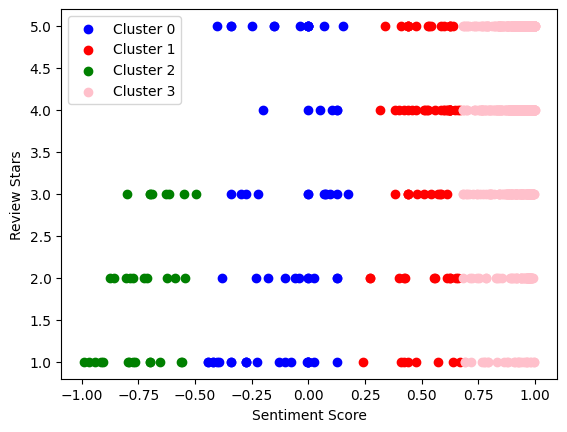

In [80]:
import matplotlib.pyplot as plt

# Create scatter plot for two clusters based on sentiment score and review length
cluster_0 = final_reviews[final_reviews['cluster_labels'] == 0]
cluster_1 = final_reviews[final_reviews['cluster_labels'] == 1]
cluster_2 = final_reviews[final_reviews['cluster_labels'] == 2]
cluster_3 = final_reviews[final_reviews['cluster_labels'] == 3]

plt.scatter(cluster_0['overall_sentiment_score'], cluster_0['stars'], color='blue', label='Cluster 0')
plt.scatter(cluster_1['overall_sentiment_score'], cluster_1['stars'], color='red', label='Cluster 1')
plt.scatter(cluster_2['overall_sentiment_score'], cluster_2['stars'], color='green', label='Cluster 2')
plt.scatter(cluster_3['overall_sentiment_score'], cluster_3['stars'], color='pink', label='Cluster 3')

plt.xlabel('Sentiment Score')
plt.ylabel('Review Stars')
plt.legend()
plt.show()


In [85]:
final_reviews1 = final_reviews.groupby('cluster_labels')['stars'].mean()
final_reviews1

cluster_labels
0    2.676923
1    3.418919
2    1.812500
3    4.000000
Name: stars, dtype: float64

In [86]:
final_reviews2 = final_reviews.groupby('cluster_labels')['overall_sentiment_score'].mean()
final_reviews2

cluster_labels
0   -0.105786
1    0.522978
2   -0.733463
3    0.929126
Name: overall_sentiment_score, dtype: float64

In [87]:
final_reviews3 = final_reviews.groupby('cluster_labels')['cool'].mean()
final_reviews3

cluster_labels
0    0.384615
1    0.554054
2    1.000000
3    1.084439
Name: cool, dtype: float64

In [88]:
final_reviews4 = final_reviews.groupby('cluster_labels')['useful'].mean()
final_reviews4

cluster_labels
0    1.153846
1    0.932432
2    1.625000
3    1.586248
Name: useful, dtype: float64

In [89]:
final_reviews5 = final_reviews.groupby('cluster_labels')['funny'].mean()
final_reviews5

cluster_labels
0    0.507692
1    0.554054
2    1.531250
3    0.671894
Name: funny, dtype: float64

In [90]:
final_reviews5 = final_reviews.groupby('cluster_labels')['business_id'].count()
final_reviews5

cluster_labels
0     65
1     74
2     32
3    829
Name: business_id, dtype: int64